In [1]:
def f(x,y):
    return x + 2*y

In [2]:
a = 4
b = 2
f(a,b)

8

In [3]:
print(a)
print(b)
print(f(b,a))

4
2
10


In [5]:
import pandas as pd
pd.DataFrame({'foo':[1,2,3],'bar':['a','b','c']})

,foo,bar
0,1,a
1,2,b
2,3,c


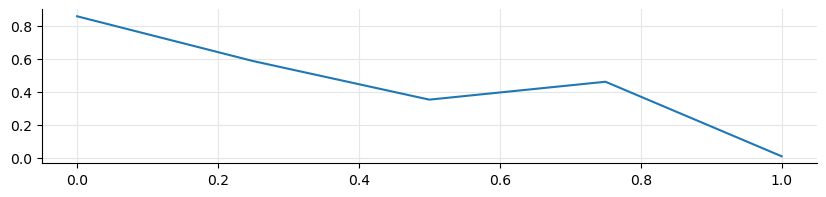

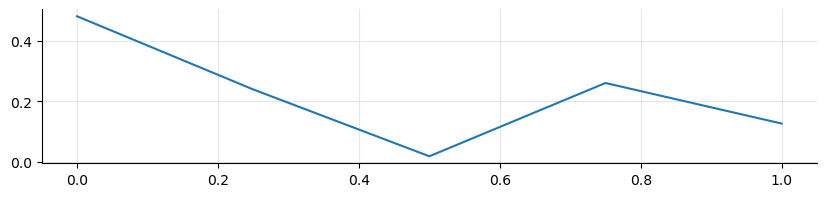

In [7]:
%matplotlib inline
import numpy as np
import utils
f,ax = utils.plot(figsize=(10,2))
ax.plot([0,0.25,0.5,0.75,1.0],np.random.random(5))

f,ax=utils.plot(figsize=(10,2))
ax.plot([0,0.25,0.5,0.75,1.0],np.random.random(5))

In [6]:
import QuantLib as ql
import pandas as pd

# Date Class

In [11]:
date = ql.Date(31,3,2015)

print(date)
print('%d-%d-%d' %(date.month(), date.dayOfMonth(), date.year()))
date.weekday() == ql.Tuesday

March 31st, 2015
3-31-2015


True

In [12]:
type(date)

QuantLib.QuantLib.Date

In [16]:
print("Add a day       : {0}".format(date +1))
print("Substract a day : {0}".format(date-1))
print("Add a week      : {0}".format(date + ql.Period(1,ql.Weeks)))
print("Add a month     : {0}".format(date + ql.Period(1,ql.Months)))
print("Add a year      : {0}".format(date + ql.Period(1,ql.Years)))

Add a day       : April 1st, 2015
Substract a day : March 30th, 2015
Add a week      : April 7th, 2015
Add a month     : April 30th, 2015
Add a year      : March 31st, 2016


In [17]:
print(date == ql.Date(31, 3, 2015))
print(date > ql.Date(30, 3, 2015))
print(date < ql.Date(1, 4, 2015))
print(date != ql.Date(1, 4, 2015))

True
True
True
True


# Calendar Class

In [21]:
date           = ql.Date(31,3,2015)
us_calendar    = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
italy_calendar = ql.Italy()

period     = ql.Period(60,ql.Days)
raw_date   = date + period
us_date    = us_calendar.advance(date, period)
italy_date = italy_calendar.advance(date, period)

print("Add 60 days:                   {0}".format(raw_date))
print("Add 60 business days in US:    {0}".format(us_date))
print("Add 60 business days in Italy: {0}".format(italy_date))

Add 60 days:                   May 30th, 2015
Add 60 business days in US:    June 24th, 2015
Add 60 business days in Italy: June 26th, 2015


In [23]:
us_busdays    = us_calendar.businessDaysBetween(date, us_date)
italy_busdays = italy_calendar.businessDaysBetween(date,italy_date)

print("Business days US:    {0}".format(us_busdays))
print("Business days Italy: {0}".format(italy_busdays))

Business days US:    60
Business days Italy: 60


In [24]:
joint_calendar   = ql.JointCalendar(us_calendar, italy_calendar)
joint_date       = joint_calendar.advance(date, period)
joint_busdays    = joint_calendar.businessDaysBetween(date,joint_date)

print("Add 60 business days in US-Italy: {0}".format(joint_date))
print("Business days US-Italy:           {0}".format(joint_busdays))

Add 60 business days in US-Italy: June 29th, 2015
Business days US-Italy:           60


# Schedul Class

"""
The Schedule object is necessary in creating coupon schedules or call schedules. Schedule object constructors have the following signature:

Schedule(const Date& effectiveDate,
         const Date& terminationDate,
         const Period& tenor,
         const Calendar& calendar,
         BusinessDayConvention convention,
         BusinessDayConvention terminationDateConvention,
         DateGeneration::Rule rule,
         bool endOfMonth,
         const Date& firstDate      = Date(),
         const Date& nextToLastDate = Date())
"""         